In [1]:
import numpy as np
import pandas as pd

In [28]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

In [4]:
import matplotlib.pyplot as plt

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
train_data_labels = np.array(train_data['label']) # labels
train_data_pixels_1d = np.array(train_data.drop(columns=['label'], axis=1))   # pixels
train_data_pixels_2d = np.array([np.reshape(image, (28, 28)) for image in train_data_pixels_1d])

Number: 1.0


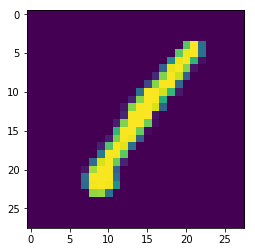

In [72]:
print("Number:", labels[0])
plt.imshow(train_data_pixels_2d[0])
plt.show()

In [73]:
# normalize data
train_data_pixels_1d = train_data_pixels_1d / 255.0

In [78]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [79]:
# make label into onehot array
one_hot_label = to_categorical(train_data_labels)

In [80]:
print(one_hot_label)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [82]:
from sklearn.model_selection import train_test_split

In [187]:
train_X, test_X, train_y, test_y = train_test_split(train_data_pixels_1d, train_data_labels, random_state=0)

# Keras Tf Model

In [188]:
import tensorflow as tf

In [189]:
# define model 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [190]:
model.compile(optimizer='adam', 
             loss = 'sparse_categorical_crossentropy', 
             metrics=['accuracy'])

In [191]:
model.fit(train_X, train_y, epochs=10, batch_size=80)

Epoch 1/10
31500/31500 [==============================] - 4s 114us/step - loss: 0.8840 - acc: 0.6652
Epoch 2/10
31500/31500 [==============================] - 3s 88us/step - loss: 0.2605 - acc: 0.9305
Epoch 3/10
31500/31500 [==============================] - 3s 91us/step - loss: 0.1954 - acc: 0.9493
Epoch 4/10
31500/31500 [==============================] - 3s 93us/step - loss: 0.1768 - acc: 0.9540
Epoch 5/10
31500/31500 [==============================] - 3s 91us/step - loss: 0.1302 - acc: 0.9657
Epoch 6/10
31500/31500 [==============================] - 3s 93us/step - loss: 0.1261 - acc: 0.9679
Epoch 7/10
31500/31500 [==============================] - 3s 93us/step - loss: 0.1069 - acc: 0.9736
Epoch 8/10
31500/31500 [==============================] - 3s 94us/step - loss: 0.0962 - acc: 0.9762
Epoch 9/10
31500/31500 [==============================] - 3s 95us/step - loss: 0.0930 - acc: 0.9769
Epoch 10/10
31500/31500 [==============================] - 3s 94us/step - loss: 0.0797 - acc: 0.980

In [192]:
val_loss, val_acc = model.evaluate(test_X, test_y)
print(val_loss, val_acc)

10500/10500 [==============================] - 1s 61us/step
0.16294570939524455 0.964


In [193]:
model.save('mnist_dense_layer.model')

# Make predictions

In [176]:
predictions = model.predict(test_X)

In [177]:
np.argmax(predictions[0])

3

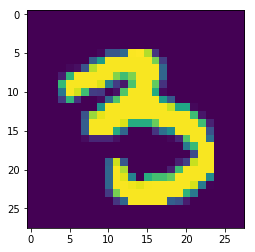

In [178]:
plt.imshow(np.reshape(test_X[0], (28, 28)))

In [179]:
submission = pd.read_csv('./data/sample_submission.csv')
submission.tail()

,ImageId,Label
27995,27996,0
27996,27997,0
27997,27998,0
27998,27999,0
27999,28000,0


# make submission

In [194]:
test_data =  np.array(test_data)
train_data_predictions = model.predict(test_data)

In [195]:
train_data_predictions_numbers = [np.argmax(pred) for pred in train_data_predictions]

In [196]:
submission_df = pd.DataFrame(columns=['ImageId', 'Label'], index=range(len(train_data_predictions)))

In [197]:
submission_df['Label'] = train_data_predictions_numbers

In [198]:
submission_df['ImageId'] = range(1, len(train_data_predictions)+1)

In [199]:
submission_df.tail()

,ImageId,Label
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
27999,28000,2


In [200]:
submission_df.to_csv('./data/submission.csv', index=False)